# To view or not to view
## Challenge statement
Welcome to the Femto Forest, a woodland where you can witness quantum phenomena while enjoying nature! For travellers who like to spend time outdoors, camping is the way to go. But there are many other indoorsy options as well. On the northwestern edge of the Femto Forest is Camp Iota, which has two areas. Area A has an amazing view of the mountains in the Tensor Tundra, but it's only a quarter of the size of Area B, which doesn't have that view.

At Camp Iota, the camp managers take advantage of the true quantum randomness to handle how to distribute the campsites; that way campers don't fight over who gets the best view. They do this through an app in their Quantum Smartphone, which prepares two states in a uniform superposition, measures them, and then passes the resulting states through a Quantum OR gate.
As you enter the forest, one of the Camp Iota managers notices all the QHack stickers on your suitcase. "If you manage to tell me how the Smartphone algorithm works" she claims with a daring grin, "I'll let you into area A without having to test your luck". Excited by this unique offer, you start mentally reviewing how logic gates work with quantum computers...

How does a Quantum OR gate work? Classical computers ultimately work by applying reversible logical operations to bits of information. One of such such operations is the OR gate denoted by ∨, which acts on two bits as follows:
\begin{align*}
|00\rangle|0\rangle &\rightarrow |00\rangle|0\rangle \\
|10\rangle|0\rangle &\rightarrow |10\rangle|1\rangle \\
|01\rangle|0\rangle &\rightarrow |01\rangle|1\rangle \\
|11\rangle|0\rangle &\rightarrow |11\rangle|1\rangle
\end{align*}

The camp managers then send the campers to area A when the OR gate yields the result 0, which only happens with probability 1/4.

We would like our quantum computers to be able to perform this basic logical operator in a reversible way. To do this, we need a circuit with three qubits. The first two qubits ∣a⟩ and ∣b⟩ (a,b∈{0,1}) encode the bits on which the OR gate acts. The third one starts in the state ∣0⟩ and ends up in ∣a∨b⟩. The action of the circuit is shown in the picture below.
![CIRCUIT](./images/To%20view%20or%20not%20to%20view_1.png)

It is possible to create this operation using only the Pauli X (qml.PauliX) and Toffoli (qml.Toffoli) gates. Your goal in this challenge is precisely to create a quantum circuit that implements an OR gate using only these gates.

## Challenge Code
In the challenge template, you must complete the or_circuit QNode which, given an array (np.array(int)) of the form [a,b,0] representing the initial state ∣a⟩∣b⟩∣0⟩, returns the state (np.tensor) ∣a⟩∣b⟩∣a∨b⟩. You may only use the Pauli X (qml.PauliX) and Toffoli (qml.Toffoli) gates.

## Input
As an input to this challenge, you are given an array [a,b,0] (np.array(int)) with a,b∈{0,1}, representing the initial state ∣a⟩∣b⟩∣0⟩.

## Output
The output, as displayed in the test cases below, is an np.tensor [a,b,a∨b] representing the state ∣a⟩∣b⟩∣a∨b⟩. The qml.state() output of or_circuit will be processed by the test functions to show the state in this form.

In [2]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device('default.qubit', wires = [0,1,2])

@qml.qnode(dev)
def or_circuit(state):

    """
    Applies an OR gate to the first and second qubits.

    Args:
        - state (np.array(int)): An array of the form [a,b,0] representing the input qubit |a>|b>|0>.
    Returns:
        - (np.tensor): The output state of the circuit as returned by qml.state().

    """

    qml.BasisState(state, wires =[0,1,2])

    qml.PauliX(wires=0)
    qml.PauliX(wires=1)

    # Apply the Toffoli gate
    qml.Toffoli(wires=[0, 1, 2])

    # Apply X gates again to revert the first two qubits to their original states
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    # Revert solution
    qml.PauliX(wires=2)

    return qml.state()


# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    state = np.real(or_circuit(ins))

    bin_string = bin(np.sum([int((state[i]*i).numpy()) for i in range(len(state))]))[2:].zfill(3)

    return str([int(elem) for elem in bin_string])

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    u = or_circuit([0,0,0])
    tape = or_circuit.qtape
    names = [op.name for op in tape.operations]

    assert names.count('BasisState') == 1, "You can't use BasisState, only the one in the template is allowed"

    for op in or_circuit.tape.operations:
        (isinstance(op, qml.BasisState) or isinstance(op, qml.Toffoli) or isinstance(op, qml.PauliX)), "You can only use Toffoli and PauliX gates"

    assert np.allclose(solution_output,expected_output, rtol = 1e-4), "Not the right output state"


# These are the public test cases
test_cases = [
    ('[0,0,0]', '[0,0,0]'),
    ('[1,0,0]', '[1,0,1]'),
    ('[0,1,0]', '[0,1,1]'),
    ('[1,1,0]', '[1,1,1]')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[0,0,0]'...
Correct!
Running test case 1 with input '[1,0,0]'...
Correct!
Running test case 2 with input '[0,1,0]'...
Correct!
Running test case 3 with input '[1,1,0]'...
Correct!


In [3]:
test_cases = [
    ('[0,0,0]', '[0,0,0]'),
    ('[1,0,0]', '[1,0,1]'),
    ('[0,1,0]', '[0,1,1]'),
    ('[1,1,0]', '[1,1,1]')
]

for i, (input_, expected_output) in enumerate(test_cases):
    output = run(input_)
    print(f"Running test case {i} with input '{input_}' --> {output}")


Running test case 0 with input '[0,0,0]' --> [0, 0, 0]
Running test case 1 with input '[1,0,0]' --> [1, 0, 1]
Running test case 2 with input '[0,1,0]' --> [0, 1, 1]
Running test case 3 with input '[1,1,0]' --> [1, 1, 1]


(<Figure size 700x400 with 1 Axes>, <Axes: >)

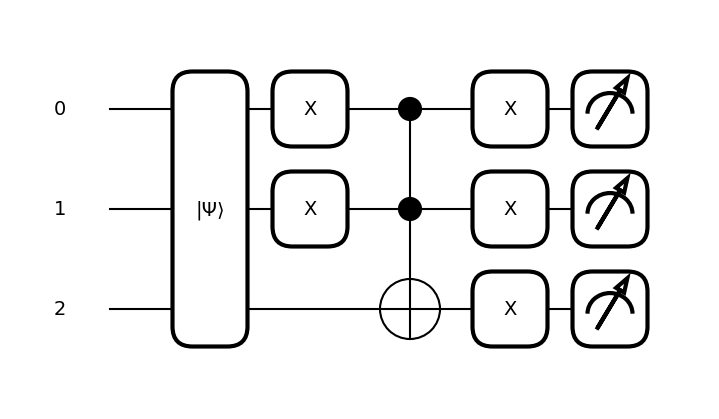

In [4]:
qml.draw_mpl(or_circuit)([0,0,0])

Resource:
* [X gate]
* [Toffoli gate](https://codebook.xanadu.ai/I.13)